<a href="https://colab.research.google.com/github/rtajeong/AI_Cluster_SEAT/blob/main/gg_11_%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95(Gradient_Descent).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# 라이브러리 설치
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# 데이터셋 구축
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

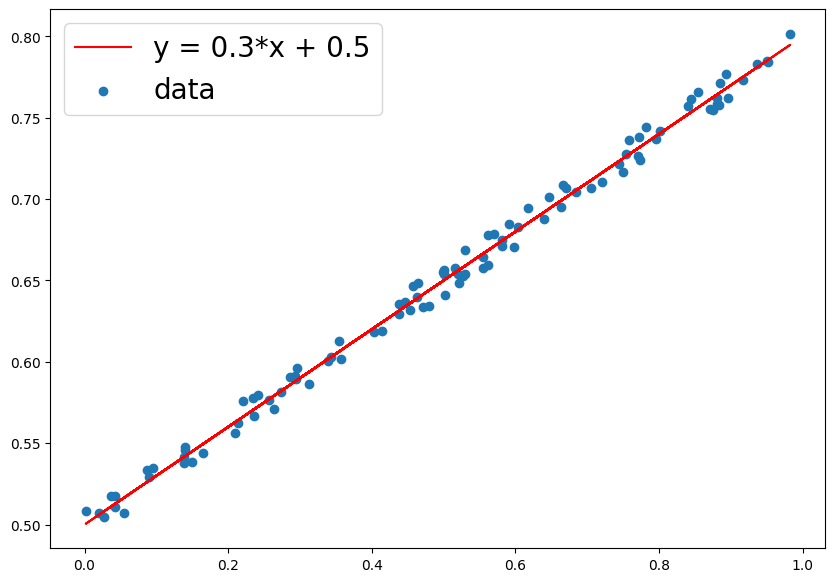

w: 0.3, b: 0.5


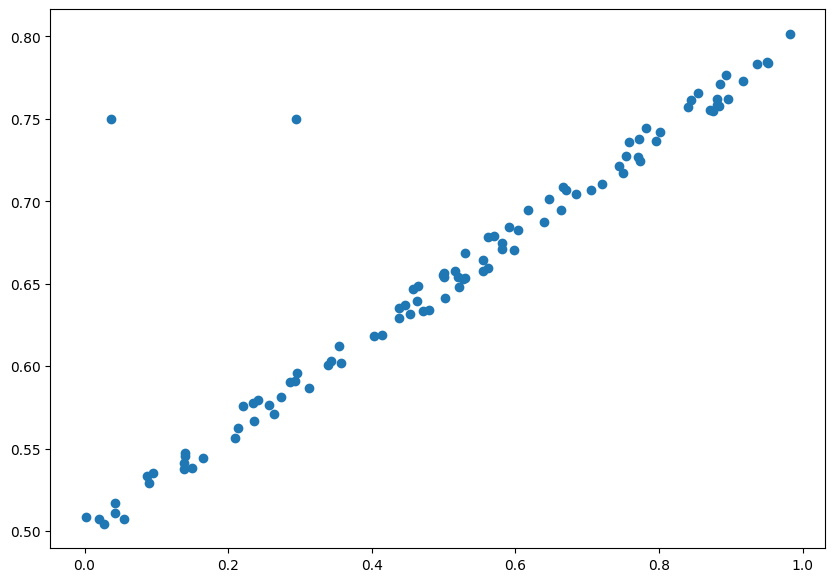

In [12]:
# linear 구축
x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

# 임의로 2개의 outlier를 추가
y[5] = 0.75
y[10] = 0.75
plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

### Gradient Descent 단항식 구현

In [13]:

# 최대 반복 횟수
num_epoch = 50

# 학습율 (learning_rate)
learning_rate = 0.5

errors = []

# random 한 값으로 w, b를 초기화 합니다.
w = np.random.uniform(low=-1.0, high=1.0)
b = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    y_hat = x * w + b

    error = ((y_hat - y)**2).mean()
    if error < 0.0005:
        break

    w = w - learning_rate * ((y_hat - y) * x).mean()
    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.20430, b = 0.39527 error = 0.18851
 5 w = 0.27140, b = 0.51790 error = 0.00083
10 w = 0.27293, b = 0.51812 error = 0.00082
15 w = 0.27388, b = 0.51762 error = 0.00082
20 w = 0.27469, b = 0.51719 error = 0.00082
25 w = 0.27540, b = 0.51681 error = 0.00082
30 w = 0.27601, b = 0.51648 error = 0.00082
35 w = 0.27654, b = 0.51620 error = 0.00082
40 w = 0.27699, b = 0.51596 error = 0.00082
45 w = 0.27738, b = 0.51575 error = 0.00082
------------------------------------------------------------
49 w = 0.3, b = 0.5 error = 0.00082


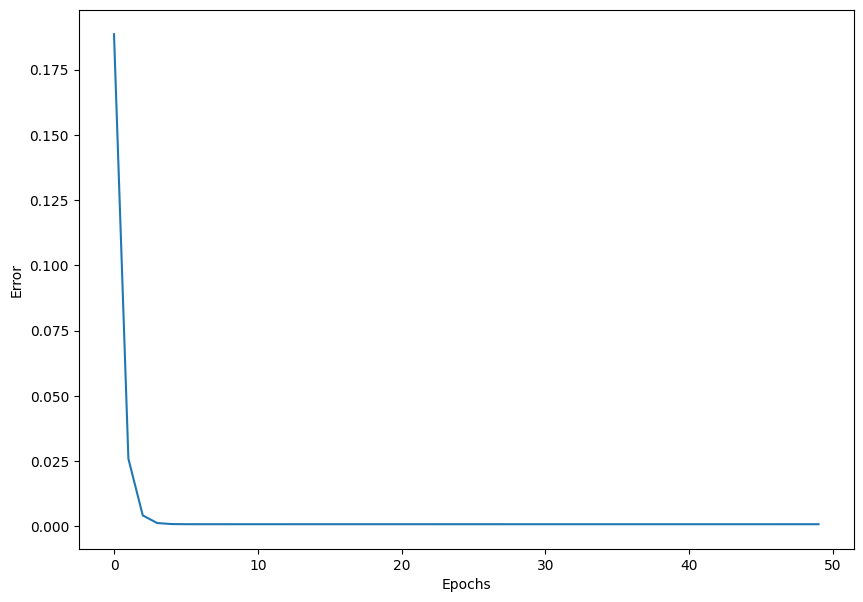

In [14]:
#시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### X 값이 여러 개인 다항식 구현

In [15]:
# 샘플 데이터 생성
# 다항식에서는 X의 갯수 만큼, W 개수도 증가
# bias (b)의 계수는 1개
x1 = np.random.rand(100)
x2 = np.random.rand(100)
x3 = np.random.rand(100)

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

b = np.random.uniform(low=-1.0, high=1.0)

In [16]:
#다항식 정의
y = 0.3 * x1 + 0.5 * x2 + 0.7 * x3 + b

In [17]:
# Gradient Descent 다항식 구현
errors = []
w1_grad = []
w2_grad = []
w3_grad = []

num_epoch = 200
learning_rate = 0.02

w1 = np.random.uniform(low=-1.0, high=1.0)
w2 = np.random.uniform(low=-1.0, high=1.0)
w3 = np.random.uniform(low=-1.0, high=1.0)

for epoch in range(num_epoch):
    # 예측값
    y_hat = w1 * x1 + w2 * x2 + w3 * x3 + b
    error = ((y_hat - y)**2).mean()
    if error < 0.00001:
        break
    # 미분값 적용 (Gradient)
    w1 = w1 - learning_rate * ((y_hat - y) * x1).mean()
    w2 = w2 - learning_rate * ((y_hat - y) * x2).mean()
    w3 = w3 - learning_rate * ((y_hat - y) * x3).mean()
    w1_grad.append(w1)
    w2_grad.append(w2)
    w3_grad.append(w3)

    b = b - learning_rate * (y_hat - y).mean()

    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w1 = {1:.5f}, w2 = {2:.5f}, w3 = {3:.5f}, b = {4:.5f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

print("----" * 15)
print("{0:2} w1 = {1:.1f}, w2 = {2:.1f}, w3 = {3:.1f}, b = {4:.1f} error = {5:.5f}".format(epoch, w1, w2, w3, b, error))

 0 w1 = 0.92661, w2 = -0.06654, w3 = -0.44841, b = 0.56105 error = 0.48540
 5 w1 = 0.94681, w2 = -0.03616, w3 = -0.41370, b = 0.61095 error = 0.37901
10 w1 = 0.96255, w2 = -0.01054, w3 = -0.38353, b = 0.65221 error = 0.30462
15 w1 = 0.97458, w2 = 0.01111, w3 = -0.35716, b = 0.68627 error = 0.25242
20 w1 = 0.98353, w2 = 0.02946, w3 = -0.33396, b = 0.71435 error = 0.21559
25 w1 = 0.98993, w2 = 0.04506, w3 = -0.31341, b = 0.73745 error = 0.18943
30 w1 = 0.99421, w2 = 0.05837, w3 = -0.29508, b = 0.75641 error = 0.17067
35 w1 = 0.99674, w2 = 0.06978, w3 = -0.27860, b = 0.77192 error = 0.15705
40 w1 = 0.99782, w2 = 0.07959, w3 = -0.26367, b = 0.78456 error = 0.14700
45 w1 = 0.99771, w2 = 0.08808, w3 = -0.25005, b = 0.79481 error = 0.13942
50 w1 = 0.99660, w2 = 0.09547, w3 = -0.23752, b = 0.80308 error = 0.13358
55 w1 = 0.99468, w2 = 0.10194, w3 = -0.22591, b = 0.80970 error = 0.12894
60 w1 = 0.99209, w2 = 0.10764, w3 = -0.21508, b = 0.81495 error = 0.12515
65 w1 = 0.98895, w2 = 0.11271, w3 =

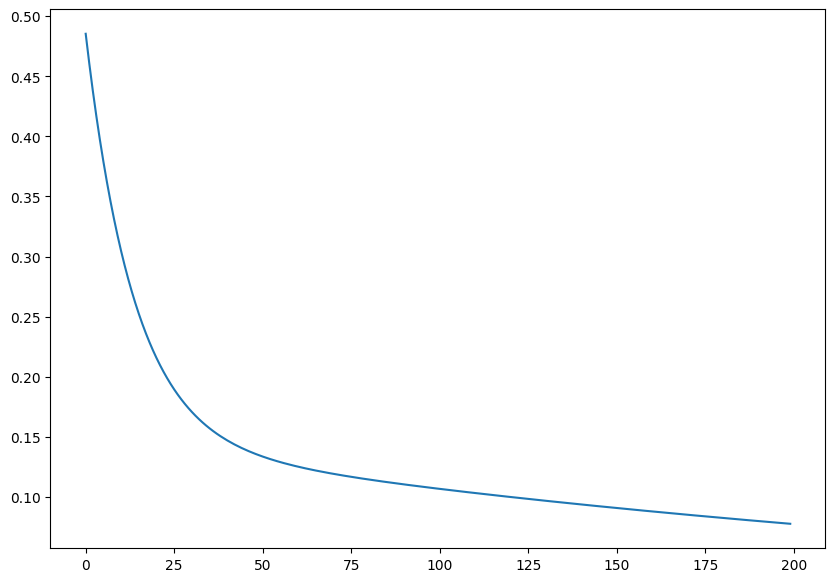

In [18]:
# Gradient Descent 다항식 시각화
plt.figure(figsize=(10, 7))
plt.plot(errors)